## Stats portion - Nicky Solares and Yunhan Yang

In [1]:
%matplotlib inline
import coevo2 as ce
import numpy as np
import itertools as it
import copy
import matplotlib.pyplot as plt
from multiprocessing import Pool
import random


## Load in team 3 results pickle

contains the matrices with MT and SCA data

In [2]:
mt_mat2,sca_intrxn = np.load('team3_results1_matsonly.npy')


## Running protein split naming convention 

if needed for plotting, 
each protein name is put into a new list with *protein*_half1 and *protein*_half2

In [4]:
names = ['cydA', 'cydB', 'fliG', 'fliM', 'fliN', 'folA', 'thyA', 'glgA', 'glgC', 'ilvB', 'ilvC','nrdA', 'nrdB', 'purC', 'purE', 'purK', 'trpA','trpB']

splitNames = []

for name in names:
    splitNames.append(name+'_half1')
    splitNames.append(name+'_half2')
    


## Load in team3 truth tables pickle

load in truth tables for 3 classifications of interactions 

create negatives table by exclusion of 1s from first three classifications

Classifications:

1- Same protein (half1 vs half2)

2- Different proteins that interact physically (half1 vs half1 *and* half1 vs half2)

3- Different proteins that interact enzymatically (half1 vs. half1 *and* half1 vs half2)

4- Proteins that are not expected to interact at all 

In [5]:
sameProt, physInt, enzInt = np.load('team3_truthtables.npy', encoding='latin1')
negatives = 1-(np.eye(36)+ sameProt + physInt + enzInt)

## Here is Andrew Schober's fancy boxplot method

plot title will be added

In [6]:
def fancy_box(data,names,outliers=False, fsize=(12,4)):
    plt.figure(figsize=fsize)
    ax = plt.gca()
    bp = ax.boxplot(data, patch_artist=True, showfliers=outliers)
    lw = 2.5
    for box in bp['boxes']:
        box.set(color='#7570b3', linewidth=lw)
        box.set(facecolor='#1b9e77' )
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=lw)
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=lw)
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=lw)
    plt.xticks(np.arange(1,len(names)+1),names,size=16);
    plt.yticks(size=14);

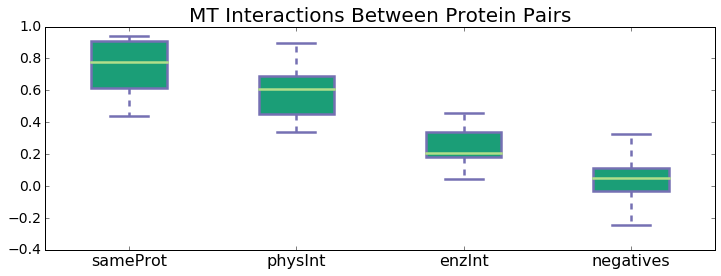

In [7]:
mt1 = mt_mat2[np.triu(sameProt.astype(bool))].flatten()
mt2 = mt_mat2[np.triu(physInt.astype(bool))].flatten()
mt3 = mt_mat2[np.triu(enzInt.astype(bool))].flatten()
mt4 = mt_mat2[np.triu(negatives.astype(bool))].flatten()

dat = [mt1, mt2, mt3, mt4]
names = ['sameProt', 'physInt', 'enzInt', 'negatives']

fancy_box(dat, names, outliers = False)
plt.title('MT Interactions Between Protein Pairs', fontsize = 20);

## Boxplot of MT Interaction Scores ^


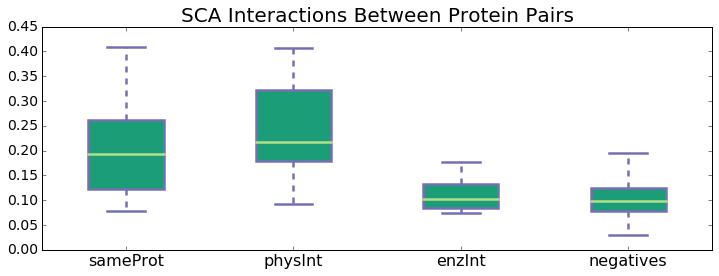

In [8]:
sca1 = sca_intrxn[np.triu(sameProt.astype(bool))].flatten()
sca2 = sca_intrxn[np.triu(physInt.astype(bool))].flatten()
sca3 = sca_intrxn[np.triu(enzInt.astype(bool))].flatten()
sca4 = sca_intrxn[np.triu(negatives.astype(bool))].flatten()

dat = [sca1, sca2, sca3, sca4]
names = ['sameProt', 'physInt', 'enzInt', 'negatives']

fancy_box(dat, names, outliers = False)
plt.title('SCA Interactions Between Protein Pairs', fontsize = 20);

## Boxplot of SCA Interaction Scores ^

## Performing ANOVA statistical test on aggregate SCA interaction scores and aggregate MT interaction scores

Using scipy one way ANOVA

In [9]:
from scipy.stats import f_oneway
stat, scanova = f_oneway(sca1, sca2, sca3, sca4)
scanova

2.0300472423910054e-40

In [10]:
from scipy.stats import f_oneway
stat, mtanova = f_oneway(mt1, mt2, mt3, mt4)
mtanova

3.5535081051390246e-112

## Performing t-test statistical test 

Perform 3 t tests on different MT interaction class scores vs MT negatives 

Perform 3 t tests on different SCA interaction class scores vs SCA negatives

Not assuming equal variance in both populations

Results provide ttest statistic and p-value. All results are as expected and every comparison except for SCA3 vs negatives has a significant p-value.

In [11]:
from scipy.stats import ttest_ind

ttest_ind(mt1, mt4, equal_var = False)

Ttest_indResult(statistic=17.99846807219637, pvalue=7.381775475189608e-13)

In [12]:
ttest_ind(mt2, mt4, equal_var = False)

Ttest_indResult(statistic=15.869091886851928, pvalue=2.483099303550305e-14)

In [13]:
ttest_ind(mt3, mt4, equal_var = False)

Ttest_indResult(statistic=7.591251325651052, pvalue=4.8770171522500285e-08)

In [14]:
ttest_ind(sca1, sca4, equal_var = False)

Ttest_indResult(statistic=4.263419020690884, pvalue=0.0005110689760547593)

In [15]:
ttest_ind(sca2, sca4, equal_var = False)

Ttest_indResult(statistic=6.362908293308822, pvalue=1.5790709919657602e-06)

In [17]:
ttest_ind(sca3, sca4, equal_var = False)

Ttest_indResult(statistic=0.540662271868216, pvalue=0.5931202305260609)

## T-test comparison of Physical vs. Enzymatic Interaction Scores

In [18]:
ttest_ind(mt2, mt3, equal_var = False)

Ttest_indResult(statistic=8.841153580261336, pvalue=5.0584480313646534e-11)

In [ ]:
ttest_ind(sca2, sca3, equal_var = False)